In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import poisson, binom

In [2]:
!gdown 1SIZC1FZvZAhVzRvnZ7IFWBUDavvzIafJ

Downloading...
From: https://drive.google.com/uc?id=1SIZC1FZvZAhVzRvnZ7IFWBUDavvzIafJ
To: d:\Vs_Code_Directory\Python\Probability_Statistics\CTL_CI\waiting_time.csv

  0%|          | 0.00/1.66M [00:00<?, ?B/s]
 63%|██████▎   | 1.05M/1.66M [00:00<00:00, 5.78MB/s]
100%|██████████| 1.66M/1.66M [00:00<00:00, 4.13MB/s]
100%|██████████| 1.66M/1.66M [00:00<00:00, 4.37MB/s]


In [4]:
data = pd.read_csv("waiting_time.csv")
data.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: ylabel='Count'>

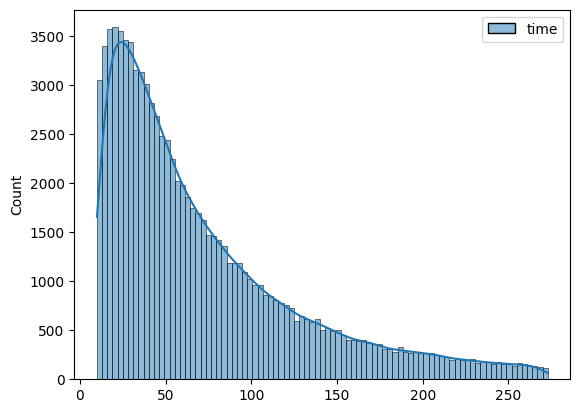

In [8]:
sns.histplot(data, kde = True)

In [9]:
# X: 1, 10, 100, 1000

# ln(1)= 0
# ln(10) = 2.3
# ln(100) = 4.6

In [10]:
log_data = np.log(data)

In [11]:
log_data

,time
0,5.214952
1,3.603363
2,3.400211
3,4.325989
4,4.118865
...,...
90041,4.911816
90042,2.722871
90043,5.336766
90044,4.945125


<Axes: ylabel='Count'>

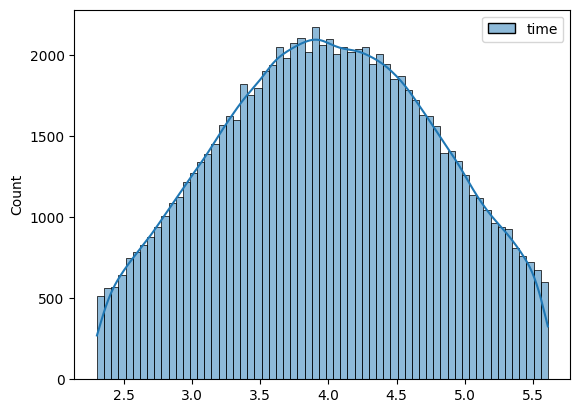

In [12]:
sns.histplot(log_data, kde = True)

In [13]:
#P(x = 0)

poisson.pmf(k = 0, mu = 2)

0.1353352832366127

In [14]:
#P(x=1)
poisson.pmf(k = 1, mu = 2)

0.2706705664732254

In [16]:
# A city sees 3 accidents per day on average.
# Find the probability that there will be 5 accidents tomorrow.

mu = 3
k = 5
poisson.pmf(k,mu)

0.10081881344492458

In [18]:
# Follow up there will be 5 or less accidents
mu = 3 
k = 5
poisson.cdf(k,mu)

0.9160820579686966

In [19]:
# It is known that a certain website makes 10 sales per hour.
# In a given hour, what is the probability that the site makes exactly 8 sales?
mu = 10 
k = 8 
poisson.pmf(k,mu)

0.11259903214902009

In [21]:
# Let “X” be the number of typos in a page in a printed book, with mean of 3 typos per page.
# What is the probability that a randomly selected page has atmost 1 typo?
mu = 3 
k = 1 
poisson.cdf(k,mu)

0.1991482734714558

In [22]:
poisson.pmf(0,mu) + poisson.pmf(1,mu)

0.1991482734714558

In [23]:
# The shop is open for 8 hours. The average number of customers is 74 - 
# assume Poisson distributed. What is the probability that in 2 hours, 
# there will be at most 15 customers?

mu = 74 * 2 / 8
k = 15
poisson.cdf(k,mu)

0.2490276915128477

In [26]:
# Follow up :
# The shop is open for 8 hours. The average number of customers is 74 - 
# assume Poisson distributed. What is the probability that in 2 hours, 
# there will be atleast 7 customers?
'''
P(x >= 7) --> 1- P(x < 7) --> 1 - P(x <= 6) -> 1 - poisson.cdf(k = 6, mu)
'''

1- poisson.cdf(k = 6, mu = 2*74/8)

0.9992622541111789

In [24]:
# It is known that a certain hospital experience 4 births per hour.
# In a given hour, what is the probability that 4 or less births occur?

mu = 4 
k = 4 
poisson.cdf(k,mu)

0.6288369351798733

In [30]:
# An e-commerce website experiences an average of 10 credit card transactions per day.
# What is the probability that there will be at least 12 credit card transactions in a given day?
mu = 10 
k = 12 
1 - poisson.cdf( 12 - 1,mu)

0.30322385369689386

In [31]:
'''
Poisson Approximation to Binomial

There are 80 students in a kinder garden class.
Each one of them has 0.015 probability of forgetting their lunch on any given day.

(a) What is the average or expected number of students who forgot lunch in the class?
(b) What is the probability that exactly 3 of them will forget their lunch today?

'''

'\nPoisson Approximation to Binomial\n\nThere are 80 students in a kinder garden class.\nEach one of them has 0.015 probability of forgetting their lunch on any given day.\n\n(a) What is the average or expected number of students who forgot lunch in the class?\n(b) What is the probability that exactly 3 of them will forget their lunch today?\n\n'

In [32]:
#Binomial

binom.pmf( n = 80, p = 0.015, k = 3)

0.08660120920447557

In [33]:
rate = 80*0.015

poisson.pmf(k = 3, mu = rate )

0.08674393303071422

In [8]:
# If electricity power failures occur according to a poisson distribution with an average of three failures every 20 weeks.

# Calculate the probability that there will not be more than one power failure during a week.

mu = 3/20
k = 1 
poisson.cdf(k,mu)

0.9898141728888165

In [12]:
# An observer counts 240 vehicles per hour (3600 seconds) at a specific vehicle arrival location on a highway.

# Assume that the arrivals follow the poisson distribution, What is the probability of one vehicle arriving over a 30-second time interval?

mu = 240 * 30 / 3600 
k = 1
poisson.pmf(k,mu)

0.2706705664732254

In [14]:
# You go to a party of 500 guests. What is the probability that exactly one other guest has the same birthday as you?

# Note: Exclude birthdays on February 29.

mu = 500 * 1 / 365
k = 1
poisson.pmf(k,mu)

0.3481394124789597